# Lab 3

## Artyom Iudin BVT2101

<div class="alert alert-block alert-info">
<b>Chapter navigation</b> isn't working on github. Download .ipynb to use it.

If it is still not working close tab with notebook and open it again.
</div>

# Chapters <a class="anchor" id="chapters"></a>
0. [Import](#import)
1. [Z-score](#z)
      1. [Read test results](#test_res)
      2. [Student histogram](#hist)
      3. [TOEFL](#toefl)
      4. [IELTS](#ielts)
      5. [Z-Score calculation for one student](#z_calc_one)
      6. [Z-Score calculation](#z_calc)
2. [Anomaly](#anomaly)
      1. [Interquantile range](#iqr)
      2. [IQR outliners](#outliners)
      3. [Anomalies by hours](#by_hours)
      4. [Anomalies by seasons](#by_seasons)
      5. [Mean, std and outliners for bikes](#mean_std)
      6. [Anomalies with shape](#shape)
      7. [Anomalies with seasons again](#season_two)
3. [Missing values](#missing)
      1. [NA values](#na)
      2. [Not NA values](#notna)
      3. [Filling with temperature 42](#fourty_two)
      4. [Drop NA](#drop)
      5. [Filling temperature with median](#median)
      6. [NumPy random for filling](#np)
      7. [Filling with median again](#median_two)
4. [Correlation](#corr)
      1. [Reading new dataset](#read)
      2. [Mean and sum](#mean_sum)
      3. [United DataFrame](#united)
      4. [First five rows](#ff)
      5. [X and Y](#xy)
      6. [Squares and product](#sap)
      7. [Correlation calculation](#corr_calc)
      8. [Correlation calculation with corr()](#pd_corr_calc)
      9. [United DataFrame correlation](#united_corr)
      10. [Scatter plot of Temperature and Rental Count](#temp_rent)

# 0. [Import](#chapters) <a class="anchor" id="import"></a>

In [2]:
import numpy as np
import pandas as pd

# 1. [Z-score](#chapters) <a class="anchor" id="z"></a>

## 1.1 [Read test results](#chapters) <a class="anchor" id="test_res"></a>

In [3]:
df = pd.read_csv('../datasets/eng_test.csv', sep=';')
df.head(5)

,Id,Exam,Score,Advanced
0,ID1,TOEFL,77.0,NO
1,ID10,TOEFL,105.0,NO
2,ID100,TOEFL,107.0,YES
3,ID101,TOEFL,72.0,NO
4,ID102,TOEFL,120.0,YES


## 1.2 [Student's histogram](#chapters) <a class="anchor" id="hist"></a>

<Axes: >

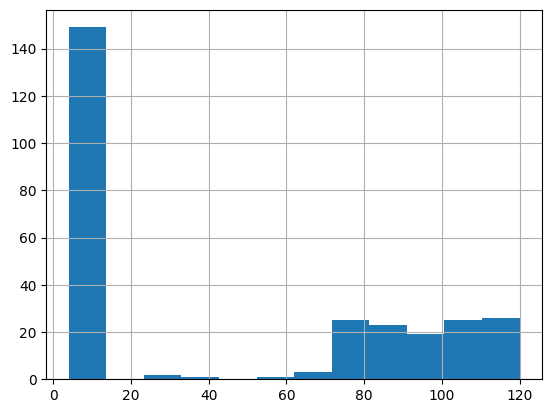

In [4]:
df.Score.hist(bins=12)

## 1.3 [TOEFL](#chapters) <a class="anchor" id="toefl"></a>

            Score
count  125.000000
mean    93.776000
std     17.903804
min     25.000000
25%     81.000000
50%     94.000000
75%    107.000000
max    120.000000


<Axes: >

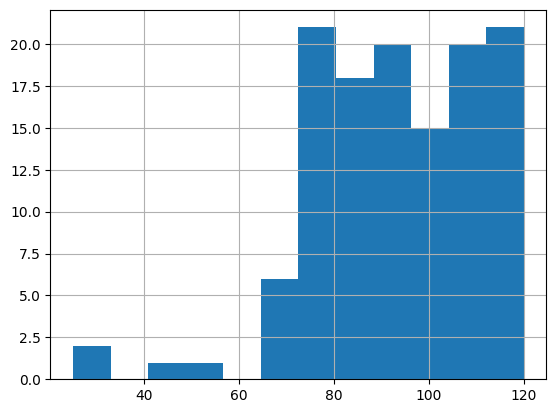

In [5]:
toefl_df = df[df['Exam'] == 'TOEFL']
print(toefl_df.describe())
toefl_df.Score.hist(bins=12)

## 1.4 [IELTS](#chapters) <a class="anchor" id="ielts"></a>

            Score
count  149.000000
mean     6.432886
std      1.571126
min      4.000000
25%      5.000000
50%      6.500000
75%      8.000000
max      9.000000


<Axes: >

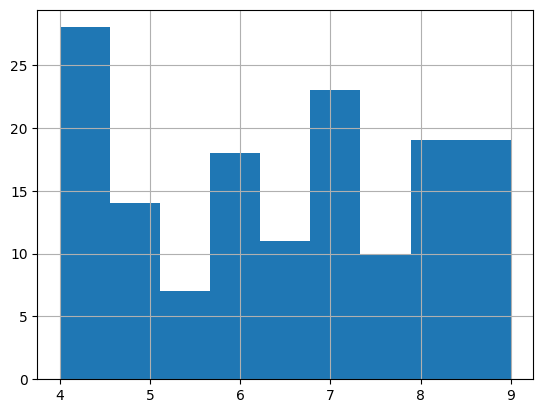

In [6]:
ielts_df = df[df['Exam'] == 'IELTS']
print(ielts_df.describe())
ielts_df.Score.hist(bins=9)

## 1.5 [Z-Score calcualtion for one student](#chapters) <a class="anchor" id="z_calc_one"></a>

Z-score formula: $z=\frac{x - \mu}{\sigma}$

In [7]:
z_score = ((toefl_df.iloc[0].Score - toefl_df.Score.mean()) / toefl_df.Score.std())
print(f"Mean = {toefl_df.Score.mean()}, std = {toefl_df.Score.std()},\
 z_score = {z_score}")

Mean = 93.776, std = 17.90380388488399, z_score = -0.9370075827385381


## 1.6 [Z-Score calculation](#chapters) <a class="anchor" id="z_calc"></a>

In [8]:
toefl = (toefl_df.Score - toefl_df.Score.mean()) / toefl_df.Score.std()
ielts = (ielts_df.Score - ielts_df.Score.mean()) / ielts_df.Score.std()

res = pd.DataFrame(pd.concat([toefl, ielts]))
df['z_score'] = res
df.sample(10)

,Id,Exam,Score,Advanced,z_score
259,ID86,TOEFL,88.0,YES,-0.322613
246,ID74,TOEFL,106.0,YES,0.682760
56,ID15,TOEFL,106.0,NO,0.682760
157,ID240,IELTS,7.0,NO,0.360960
173,ID255,IELTS,6.0,NO,-0.275526
199,ID31,TOEFL,103.0,YES,0.515198
209,ID40,TOEFL,103.0,YES,0.515198
252,ID8,TOEFL,87.0,NO,-0.378467
28,ID124,TOEFL,97.0,YES,0.180073
38,ID133,IELTS,5.0,YES,-0.912012


# 2. [Anomaly](#chapters) <a class="anchor" id="anomaly"></a>

In [9]:
bikes = pd.read_pickle('../datasets/BikesDataVars.pkl')
bikes.sample(10)

,Date,Hour,Temperature,Humidity,Wind speed,Rainfall,Snowfall,Seasons,Holiday,Functioning Day,Rental Count,Normal Humidity,Temperature Category,Good Weather
5615,2018-07-22,23,31.2,52,1.5,0.0,0.0,Summer,0,True,1221,1,Hot,0
3358,2018-04-19,22,13.4,49,1.1,0.0,0.0,Spring,0,True,1654,1,Chilly,0
3190,2018-04-12,22,13.5,15,2.2,0.0,0.0,Spring,0,True,1863,0,Chilly,0
3881,2018-05-11,17,18.9,45,2.6,0.0,0.0,Spring,0,True,3106,1,Nice,1
7581,2018-10-12,21,11.0,60,1.1,0.0,0.0,Autumn,0,True,1294,1,Chilly,0
8709,2018-11-28,21,4.2,31,1.1,0.0,0.0,Autumn,0,True,692,0,Chilly,0
4405,2018-06-02,13,29.6,24,2.4,0.0,0.0,Summer,0,True,1374,0,Hot,0
1201,2018-01-20,1,-0.9,64,0.4,0.0,0.0,Winter,0,True,212,0,Freezing,0
3431,2018-04-22,23,11.3,94,1.6,3.0,0.0,Spring,0,True,29,0,Chilly,0
5176,2018-07-04,16,31.6,57,2.7,0.0,0.0,Summer,0,True,2325,1,Hot,0


## 2.1 [Interquantile range](#chapters) <a class="anchor" id="iqr"></a>

In [10]:
q1, q3 = bikes['Rental Count'].quantile([0.25, 0.75])
iqr = q3 - q1
print(f"Interquantile range for 'Rental Count' is {iqr}")

Interquantile range for 'Rental Count' is 852.0


## 2.2 [IQR Outliners](#chapters) <a class="anchor" id="outliners"></a>

In [11]:
outliner_bottom = q1 - 1.5 * iqr
outliner_up = q3 + 1.5 * iqr
print(outliner_bottom, outliner_up)

-1121.0 2287.0


## 2.3 [Anomalies by hours](#chapters) <a class="anchor" id="by_hours"></a>

In [12]:
bikes[(bikes['Rental Count'] < outliner_bottom) | (bikes['Rental Count'] > outliner_up)]['Hour'].value_counts().sort_index()

Hour
7      4
8     38
9      1
13     7
14     8
15    10
16    23
17    51
18    95
19    64
20    48
21    39
22    21
23     4
Name: count, dtype: int64

## 2.4 [Anomalies by seasons](#chapters) <a class="anchor" id="by_seasons"></a>

In [13]:
bikes[(bikes['Rental Count'] < outliner_bottom) | (bikes['Rental Count'] > outliner_up)]['Seasons'].value_counts()

Seasons
Summer    196
Autumn    116
Spring    101
Name: count, dtype: int64

## 2.5 [Mean, std and outliners for bikes](#chapters) <a class="anchor" id="mean_std"></a>

In [14]:
mean = bikes['Rental Count'].mean()
std = bikes['Rental Count'].std()
outliner_bottom = q1 - 2.5 * iqr
outliner_up = q3 + 2.5 * iqr

print(f"mean: {mean:.2f}, std: {std:.2f}, outliner bottom: {outliner_bottom},\
 up: {outliner_up}")

mean: 696.58, std: 749.81, outliner bottom: -1973.0 up: 3139.0


## 2.6 [Anomalies with shape](#chapters) <a class="anchor" id="shape"></a>

In [15]:
bikes[(bikes['Rental Count'] < outliner_bottom) | (bikes['Rental Count'] > outliner_up)].shape

(128, 14)

## 2.7 [Anomalies with seasons again](#chapters) <a class="anchor" id="season_two"></a>

In [16]:
bikes[(bikes['Rental Count'] < outliner_bottom) | (bikes['Rental Count'] > outliner_up)]['Seasons'].value_counts()

Seasons
Summer    71
Autumn    32
Spring    25
Name: count, dtype: int64

# 3. [Missing values](#chapters) <a class="anchor" id="missing"></a>

## 3.1 [NA values](#chapters) <a class="anchor" id="na"></a>

In [21]:
bikes.isna().sum()

Date                      0
Hour                      0
Temperature             179
Humidity                  0
Wind speed                0
Rainfall                  0
Snowfall                  0
Seasons                   0
Holiday                   0
Functioning Day           0
Rental Count              0
Normal Humidity           0
Temperature Category    179
Good Weather              0
dtype: int64

## 3.2 [Not NA values](#chapters) <a class="anchor" id="notna"></a>

In [23]:
bikes.notna().sum()

Date                    8760
Hour                    8760
Temperature             8581
Humidity                8760
Wind speed              8760
Rainfall                8760
Snowfall                8760
Seasons                 8760
Holiday                 8760
Functioning Day         8760
Rental Count            8760
Normal Humidity         8760
Temperature Category    8581
Good Weather            8760
dtype: int64

## 3.3 [Filling temperature with 42](#chapters) <a class="anchor" id="fourty_two"></a>

In [27]:
bikes1 = bikes.copy()
bikes1.fillna({'Temperature':42}, inplace=True)
bikes1.isna().sum()

Date                      0
Hour                      0
Temperature               0
Humidity                  0
Wind speed                0
Rainfall                  0
Snowfall                  0
Seasons                   0
Holiday                   0
Functioning Day           0
Rental Count              0
Normal Humidity           0
Temperature Category    179
Good Weather              0
dtype: int64

## 3.4 [Drop NA](#chapters) <a class="anchor" id="drop"></a>

In [29]:
bikes1.dropna().isna().sum()

Date                    0
Hour                    0
Temperature             0
Humidity                0
Wind speed              0
Rainfall                0
Snowfall                0
Seasons                 0
Holiday                 0
Functioning Day         0
Rental Count            0
Normal Humidity         0
Temperature Category    0
Good Weather            0
dtype: int64

## 3.5 [Filling temperature with median](#chapters) <a class="anchor" id="median"></a>

In [37]:
bikes['Temperature_Median'] = bikes['Temperature'].fillna(bikes['Temperature'].median())
bikes.isna().sum().iloc[-1]

0

## 3.6 [NumPy random for filling](#chapters) <a class="anchor" id="np"></a>

In [33]:
temps = np.random.choice(bikes['Temperature'].dropna(), 8760)
temps[:100]

array([  1.9,  10. ,   4.3,   1.3,  27.1,   3.8,   6.4,  11.8,  42. ,
        25.3,  17.7,  21.9,  27.6,   7.2,  16. ,   3. ,  -5.5,  22.3,
        11.9,  -1.6,  29.8,  12.7,  14.4,   4.7,  22.8,   7.9,  33.4,
        16.2,  11.3,  28.4,  11.3,  20.3,  19.4,  29.4,   4.6,   2.9,
        20.4,   7.1,   4.4,  24.2, -11.7,  32.3,   9.5,   5.7,  19. ,
        20.2,  10.2,  -0.2,  28.8,  16.4,  -0.6,  27.8,   0.6,  19.3,
        11. ,  11.9,  24.4,  11.8,  32.3,   0.2,  29.5,  30.9,  -3.2,
        -2.2,  12.4,  24.1,  24. ,  15.3,  10.8,  -6. ,   4.1,   0.9,
         6.9,  25.4,  18.8,  27.8,  19.6,  12.3,  22.5,  -0.6,  25.7,
         1.1, -10.2,   3.5,  -1.1,  10.2,   7.8,   8.6,   7.5,  10.1,
         8.1,  -8.3, -14.6,   4.7,  22.3,  19.1,   0. ,  26.3,   0.5,
        25.4])

In [38]:
bikes['Temperature_Random'] = bikes['Temperature'].fillna(pd.Series(temps))
bikes.isna().sum().iloc[-1]

0

## 3.7 [Filling with median again](#chapters) <a class="anchor" id="median_two"></a>

In [42]:
bikes1.fillna({'Temperature': bikes1.Temperature.median()}, inplace=True)
bikes1.isna().sum()

Date                      0
Hour                      0
Temperature               0
Humidity                  0
Wind speed                0
Rainfall                  0
Snowfall                  0
Seasons                   0
Holiday                   0
Functioning Day           0
Rental Count              0
Normal Humidity           0
Temperature Category    179
Good Weather              0
dtype: int64

# 4. [Correlation](#chapters) <a class="anchor" id="corr"></a>

## 4.1 [Reading new dataset](#chapters) <a class="anchor" id="read"></a>

In [44]:
bikes = pd.read_pickle('../datasets/BikesDataImputed.pkl')

## 4.2 [Mean and sum](#chapters) <a class="anchor" id="mean_sum"></a>

In [46]:
temp_mean = bikes.groupby(bikes['Date'].dt.isocalendar().week)['Temperature'].mean()
bikes_sum = bikes.groupby(bikes['Date'].dt.isocalendar().week)['Rental Count'].sum()

## 4.3 [United DataFrame](#chapters) <a class="anchor" id="united"></a>

In [47]:
united_df = pd.concat([temp_mean, bikes_sum], axis=1)
united_df.sample(10)

,Temperature,Rental Count
week,,
29,29.297619,172636
45,11.590774,66682
24,21.751190,220392
20,19.307738,142346
25,24.036012,213553
33,29.238690,166679
18,16.365476,146127
52,-1.651786,34460
1,-2.694940,39441


## 4.4 [First five rows](#chapters) <a class="anchor" id="ff"></a>

In [61]:
first_five = united_df.iloc[:5]

In [63]:
first_five.head()

,Temperature,Rental Count,X - Mx,Y - My
week,,,,
1,-2.694940,39441,-15.598503,-77906.288462
2,-5.079762,30871,-17.983325,-86476.288462
3,2.662500,42193,-10.241063,-75154.288462
4,-10.038690,23079,-22.942253,-94268.288462
5,-5.650595,28415,-18.554158,-88932.288462


## 4.5 [X and Y](#chapters) <a class="anchor" id="xy"></a>

In [67]:
first_five.loc[:, 'X - Mx'] = first_five['Temperature'] - first_five['Temperature'].mean()
first_five.loc[:, 'Y - My'] = first_five['Rental Count'] - first_five['Rental Count'].mean()
first_five.head()

## 4.6 [Squares and product](#chapters) <a class="anchor" id="sap"></a>

In [70]:
square_x = (first_five['X - Mx'] ** 2).sum()
square_y = (first_five['Y - My'] ** 2).sum()
product = (first_five['X - Mx'] * first_five['Y - My']).sum()
print(f"Square x: {square_x:.2f}, square y: {square_y:.2f} and their product: {product:.2f}")

Square x: 86.32, square y: 249778436.80 and their product: 139270.43


## 4.7 [Correlation calculation](#chapters) <a class="anchor" id="corr_calc"></a>

Pearson correlation formula: $\rho =\frac{n\sum_{}^{}xy-\sum_{}^{}x\sum_{}^{}y}{\sqrt{\left[n\sum_{}^{} x^{2} - (\sum_{}^{}x)^{2} \right]\left[n\sum_{}^{} y^{2} - (\sum_{}^{}y)^{2}  \right]}}$

In [71]:
product / ((square_x * square_y) ** (0.5))

0.9484760874616524

## 4.8 [Correlation calculation with corr()](#chapters) <a class="anchor" id="pd_corr_calc"></a>

In [73]:
first_five['Temperature'].corr(first_five['Rental Count'])

0.9484760874616526

## 4.9 [United DataFrame correlation](#chapters) <a class="anchor" id="united_corr"></a>

In [74]:
united_df['Temperature'].corr(united_df['Rental Count'])

0.8458075200534891

## 4.10 [Scatter of Temperature and Rental Count](#chapters) <a class="anchor" id="temp_rent"></a>

<Axes: xlabel='Temperature', ylabel='Rental Count'>

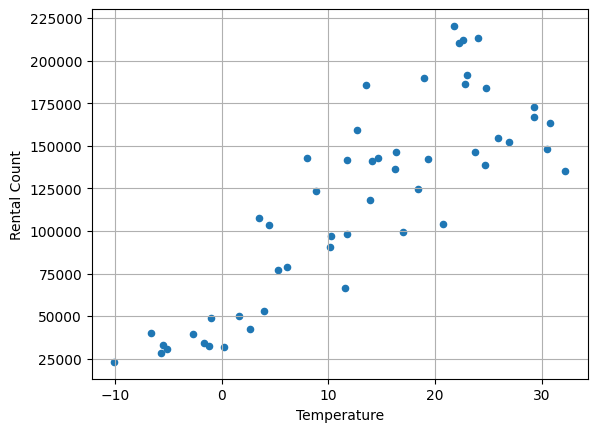

In [76]:
united_df.plot.scatter('Temperature', 'Rental Count', grid=True)